# 檢查數據資料

In [71]:
import pandas as pd
import sklearn.preprocessing as sp
import sklearn.metrics as sm
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance

data_train=pd.read_csv('train_ctrUa4K.csv')
data_test=pd.read_csv('test_lAUu6dG.csv')

data_id=data_test['Loan_ID']

#取出 是否核貸 + 編碼
data_train['Loan_Status']=data_train['Loan_Status'].replace('Y',1)
data_train['Loan_Status']=data_train['Loan_Status'].replace('N',0)

train_y=data_train['Loan_Status']

#合併兩個檔案 
data_all=pd.concat([data_train,data_test])

#標頭排序
data_all=data_all.reset_index(drop=True)

# 查看屬性
print(data_train.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [ ]:
'''
屬性說明:
Loan_ID             Unique Loan ID
Gender              Male/ Female
Married             Applicant married (Y/N)
Dependents          Number of dependents
Education           Applicant Education (Graduate/ Under Graduate)
Self_Employed       Self employed (Y/N)
ApplicantIncome     Applicant income
CoapplicantIncome   Coapplicant income
LoanAmount          Loan amount in thousands
Loan_Amount_Term    Term of loan in months
Credit_History      credit history meets guidelines
Property_Area       Urban/ Semi Urban/ Rural
Loan_Status         Loan approved (Y/N)
'''

In [50]:
# 前五筆資料
print(data_train.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area  Loan_Status  
0             1.0         Urban            1  
1             1.0         Rural            0  
2             1.0

In [51]:
# 查看有無缺失值
print(data_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null float64
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 99.7+ KB
None


In [52]:
#查看數值分布
print(data_all.describe())

       ApplicantIncome  CoapplicantIncome  Credit_History  LoanAmount  \
count       981.000000         981.000000      902.000000  954.000000   
mean       5179.795107        1601.916330        0.835920  142.511530   
std        5695.104533        2718.772806        0.370553   77.421743   
min           0.000000           0.000000        0.000000    9.000000   
25%        2875.000000           0.000000        1.000000  100.000000   
50%        3800.000000        1110.000000        1.000000  126.000000   
75%        5516.000000        2365.000000        1.000000  162.000000   
max       81000.000000       41667.000000        1.000000  700.000000   

       Loan_Amount_Term  Loan_Status  
count        961.000000   614.000000  
mean         342.201873     0.687296  
std           65.100602     0.463973  
min            6.000000     0.000000  
25%          360.000000     0.000000  
50%          360.000000     1.000000  
75%          360.000000     1.000000  
max          480.000000     1.

In [72]:
# 補缺失值 數字na轉成 均值  字符na轉成 nn
o=['Gender','Married','Dependents','Self_Employed']
data_all[o]=data_all[o].fillna('NN')

data_all['LoanAmount']=data_all['LoanAmount'].fillna(142)
data_all['Loan_Amount_Term']=data_all['Loan_Amount_Term'].fillna(342)
data_all['Credit_History']=data_all['Credit_History'].fillna(0)
print(data_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       981 non-null float64
Dependents           981 non-null object
Education            981 non-null object
Gender               981 non-null object
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null float64
Married              981 non-null object
Property_Area        981 non-null object
Self_Employed        981 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 99.7+ KB
None


# 屬性可視化
### 屬性與核貸情況

<Figure size 432x288 with 0 Axes>

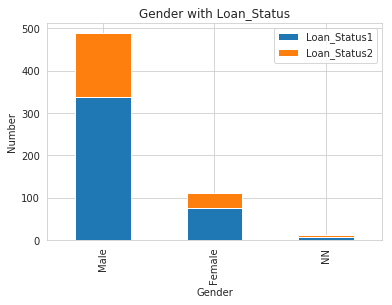

,Loan_Status1,Loan_Status2,Total,%
Male,339,150,489,69.33
Female,75,37,112,66.96
NN,8,5,13,61.54


In [54]:
# Gender
fig = plt.figure()
fig.set(alpha=0.2) 

Loan_Status1 = data_all.Gender[data_all.Loan_Status == 1].value_counts()
Loan_Status2 = data_all.Gender[data_all.Loan_Status == 0].value_counts()

df=pd.DataFrame({'Loan_Status1':Loan_Status1,'Loan_Status2':Loan_Status2})

df.plot(kind='bar',stacked=True)
plt.title("Gender with Loan_Status")
plt.xlabel("Gender") 
plt.ylabel("Number") 
plt.legend()
plt.show()

# 查看貸款成功比例
df['Total'] = df['Loan_Status1']+df['Loan_Status2']
df['%'] = (df['Loan_Status1'] / df['Total'])*100

df.style.format('{:.2f}', subset='%').background_gradient('Blues',subset="%")

<Figure size 432x288 with 0 Axes>

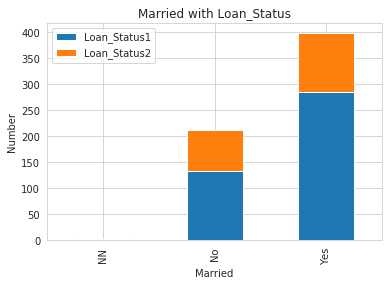

,Loan_Status1,Loan_Status2,Total,%
NN,3,0,3,100.00
No,134,79,213,62.91
Yes,285,113,398,71.61


In [55]:
# Married
fig = plt.figure()
fig.set(alpha=0.2) 

Loan_Status1 = data_all.Married[data_all.Loan_Status == 1].value_counts()
Loan_Status2 = data_all.Married[data_all.Loan_Status == 0].value_counts()

df=pd.DataFrame({'Loan_Status1':Loan_Status1,'Loan_Status2':Loan_Status2})

df.plot(kind='bar',stacked=True)
plt.title("Married with Loan_Status")
plt.xlabel("Married") 
plt.ylabel("Number") 
plt.legend()
plt.show()

# 查看貸款成功比例
df['Loan_Status2']=df['Loan_Status2'].fillna(0) # 沒有貸款失敗次數 補0

df['Total'] = df['Loan_Status1']+df['Loan_Status2']
df['%'] = (df['Loan_Status1'] / df['Total'])*100

df.style.format('{:.2f}', subset='%').background_gradient('Blues',subset="%")

<Figure size 432x288 with 0 Axes>

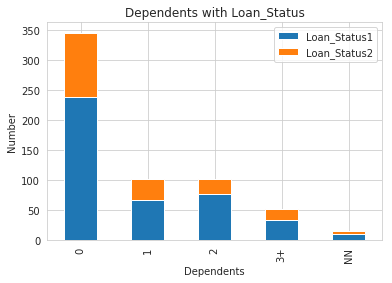

,Loan_Status1,Loan_Status2,Total,%
0,238,107,345,68.99
1,66,36,102,64.71
2,76,25,101,75.25
3+,33,18,51,64.71
NN,9,6,15,60.00


In [56]:
# Dependents
fig = plt.figure()
fig.set(alpha=0.2) 

Loan_Status1 = data_all.Dependents[data_all.Loan_Status == 1].value_counts()
Loan_Status2 = data_all.Dependents[data_all.Loan_Status == 0].value_counts()

df=pd.DataFrame({'Loan_Status1':Loan_Status1,'Loan_Status2':Loan_Status2})

df.plot(kind='bar',stacked=True)
plt.title("Dependents with Loan_Status")
plt.xlabel("Dependents") 
plt.ylabel("Number") 
plt.legend()
plt.show()

# 查看貸款成功比例
df['Total'] = df['Loan_Status1']+df['Loan_Status2']
df['%'] = (df['Loan_Status1'] / df['Total'])*100

df.style.format('{:.2f}', subset='%').background_gradient('Blues',subset="%")

<Figure size 432x288 with 0 Axes>

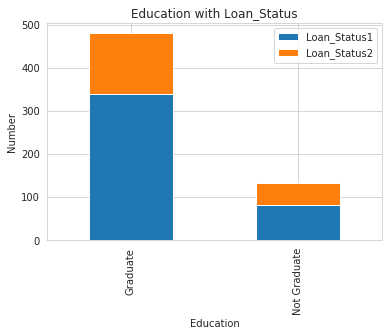

,Loan_Status1,Loan_Status2,Total,%
Graduate,340,140,480,70.83
Not Graduate,82,52,134,61.19


In [57]:
# Education
fig = plt.figure()
fig.set(alpha=0.2) 

Loan_Status1 = data_all.Education[data_all.Loan_Status == 1].value_counts()
Loan_Status2 = data_all.Education[data_all.Loan_Status == 0].value_counts()

df=pd.DataFrame({'Loan_Status1':Loan_Status1,'Loan_Status2':Loan_Status2})

df.plot(kind='bar',stacked=True)
plt.title("Education with Loan_Status")
plt.xlabel("Education") 
plt.ylabel("Number") 
plt.legend()
plt.show()

# 查看貸款成功比例
df['Total'] = df['Loan_Status1']+df['Loan_Status2']
df['%'] = (df['Loan_Status1'] / df['Total'])*100

df.style.format('{:.2f}', subset='%').background_gradient('Blues',subset="%")

<Figure size 432x288 with 0 Axes>

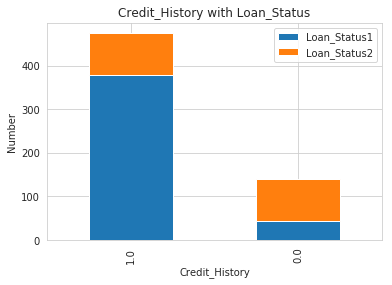

,Loan_Status1,Loan_Status2,Total,%
1.0,378,97,475,79.58
0.0,44,95,139,31.65


In [58]:
# Credit_History
fig = plt.figure()
fig.set(alpha=0.2) 

Loan_Status1 = data_all.Credit_History[data_all.Loan_Status == 1].value_counts()
Loan_Status2 = data_all.Credit_History[data_all.Loan_Status == 0].value_counts()

df=pd.DataFrame({'Loan_Status1':Loan_Status1,'Loan_Status2':Loan_Status2})

df.plot(kind='bar',stacked=True)
plt.title("Credit_History with Loan_Status")
plt.xlabel("Credit_History") 
plt.ylabel("Number") 
plt.legend()
plt.show()

# 查看貸款成功比例
df['Total'] = df['Loan_Status1']+df['Loan_Status2']
df['%'] = (df['Loan_Status1'] / df['Total'])*100

df.style.format('{:.2f}', subset='%').background_gradient('Blues',subset="%")

<Figure size 432x288 with 0 Axes>

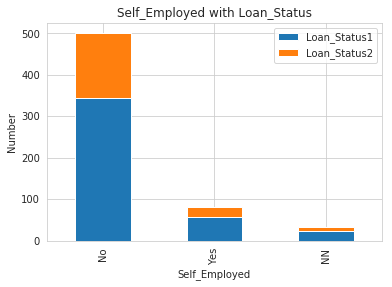

,Loan_Status1,Loan_Status2,Total,%
No,343,157,500,68.60
Yes,56,26,82,68.29
NN,23,9,32,71.88


In [59]:
# Self_Employed
fig = plt.figure()
fig.set(alpha=0.2) 

Loan_Status1 = data_all.Self_Employed[data_all.Loan_Status == 1].value_counts()
Loan_Status2 = data_all.Self_Employed[data_all.Loan_Status == 0].value_counts()

df=pd.DataFrame({'Loan_Status1':Loan_Status1,'Loan_Status2':Loan_Status2})

df.plot(kind='bar',stacked=True)
plt.title("Self_Employed with Loan_Status")
plt.xlabel("Self_Employed") 
plt.ylabel("Number") 
plt.legend()
plt.show()

# 查看貸款成功比例
df['Total'] = df['Loan_Status1']+df['Loan_Status2']
df['%'] = (df['Loan_Status1'] / df['Total'])*100

df.style.format('{:.2f}', subset='%').background_gradient('Blues',subset="%")

<Figure size 432x288 with 0 Axes>

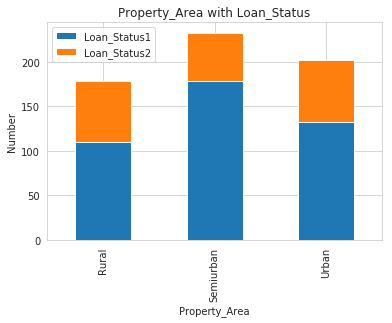

,Loan_Status1,Loan_Status2,Total,%
Rural,110,69,179,61.45
Semiurban,179,54,233,76.82
Urban,133,69,202,65.84


In [60]:
# Property_Area
fig = plt.figure()
fig.set(alpha=0.2) 

Loan_Status1 = data_all.Property_Area[data_all.Loan_Status == 1].value_counts()
Loan_Status2 = data_all.Property_Area[data_all.Loan_Status == 0].value_counts()

df=pd.DataFrame({'Loan_Status1':Loan_Status1,'Loan_Status2':Loan_Status2})

df.plot(kind='bar',stacked=True)
plt.title("Property_Area with Loan_Status")
plt.xlabel("Property_Area") 
plt.ylabel("Number") 
plt.legend()
plt.show()

# 查看貸款成功比例
df['Total'] = df['Loan_Status1']+df['Loan_Status2']
df['%'] = (df['Loan_Status1'] / df['Total'])*100

df.style.format('{:.2f}', subset='%').background_gradient('Blues',subset="%")

### 由上圖可以得知:
* 性別: 男性申請總數遠遠大於女性，申請核貸成功比例差距不大
* 婚姻: 已結婚申請成功比例較大
* 扶養: 單身申請案件最多，成功貸款也較高，但有扶養2人的貸款成功率也高
* 學歷: 教育程度高，成功貸款機率也高
* 紀錄: 有貸款紀錄也有助於核貸成功機率
* 自營: 大多數申請者非自營
* 地區: 在 Semiurban 貸款成功機率較高

### 屬性相關性

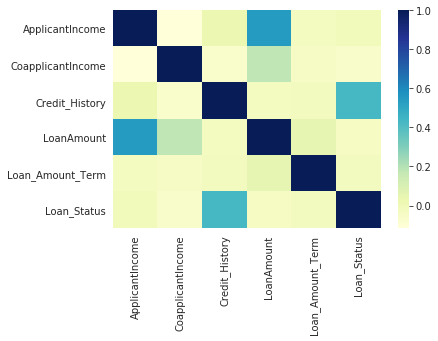

In [61]:
import seaborn as sns

# 屬性相關性
corr=data_all.corr()

# 畫關係圖 格線顏色
sns.set_style('whitegrid')

# 關係圖 顏色深 關係大
sns.heatmap(corr,cmap='YlGnBu')

plt.show()

### 相關性較高
* 貸款金額(LoanAmount) 與 申請人收入(ApplicantIncome)
* 是否核貸(Loan_Status) 與 有無申請紀錄(Credit_History) 

# 機器學習

In [73]:
# 僅將字串轉換為One hot encoding表示形式，沒指定columns會全部轉換
data_dum = pd.get_dummies(data_all)
data_dum=pd.DataFrame(data_dum)

# 整個轉碼
encoders,train_x=[],[]
for row in data_dum:
    encoder=sp.LabelEncoder()
    train_x.append(encoder.fit_transform(data_dum[row]))
    encoders.append(encoder)

train_x=pd.DataFrame(train_x).T

# 訓練
train_x2=train_x[:614]

modelx2=XGBClassifier(learning_rate=0.01,n_estimators=400,max_depth=10,min_child_weight=1,
                      seed=0,subsample=0.8,colsample_bytree=0.8,gamma=0.2,reg_alpha=3,reg_lambda=0.05)

modelx2.fit(train_x2,train_y)
pred_y = modelx2.predict(train_x2)

# 預測是否核貸 上傳至Analytics Vidhya

In [63]:
# 測試
test_x=train_x[614:]

pred_y2 = modelx2.predict(test_x)

df=pd.DataFrame(pred_y2, columns=['Loan_Status'])
df=df.replace(1,'Y')
df=df.replace(0,'N')

#抓取id
ID=pd.DataFrame(data_id)

#合併
ans = ID.join(df)
ans=ans.set_index('Loan_ID')
print(ans.head())
#ans.to_csv('one2.csv')

         Loan_Status
Loan_ID             
LP001015           Y
LP001022           Y
LP001031           Y
LP001035           Y
LP001051           Y


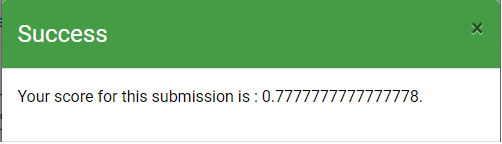

## xgboost 調整模型參數代碼
#### 以下為帶入所有資料所得出的最佳參數

In [67]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# 1、最佳迭代次数：n_estimators  
cv_params = {'n_estimators': [400, 500, 600, 700, 800]}
other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1,
'seed': 0,'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

# 2 , 3 , 4 ...逐一帶入

model7 = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model7, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)

optimized_GBM.fit(train_x2, train_y)

print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  1.4min finished


参数的最佳取值：{'n_estimators': 400}
最佳模型得分:1.0


### 按照以下順序 將最佳參數帶入做測試 
#### 將前一個最佳值帶入再測試

In [ ]:
#2、调试的参数min_child_weight以及max_depth    /2 /4 / 0.9017
# cv_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 2, 3, 4, 5, 6]}
# other_params = {'learning_rate': 0.1, 'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 1,
# 'seed': 0,'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

#3、调试参数：gamma： / 0.6 / 0.9026
# cv_params = {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
# other_params = {'learning_rate': 0.1, 'n_estimators': 400, 'max_depth': 4, 'min_child_weight': 2,
# 'seed': 0,'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

#4、接着subsample及colsample_bytree： / 0.7 /0.7 / 0.9032
# cv_params = {'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}
# other_params = {'learning_rate': 0.1, 'n_estimators': 400, 'max_depth': 4, 'min_child_weight': 2,
# 'seed': 0,'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.6, 'reg_alpha': 0, 'reg_lambda': 1}

#5、紧接着reg_alpha及reg_lambda  / 2 / 3 / 0.9051
# cv_params = {'reg_alpha': [0.05, 0.1, 1, 2, 3], 'reg_lambda': [0.05, 0.1, 1, 2, 3]}
# other_params = {'learning_rate': 0.1, 'n_estimators': 400, 'max_depth': 4, 'min_child_weight': 2,
# 'seed': 0,'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': 0.6, 'reg_alpha': 0, 'reg_lambda': 1}

#6、最后learning_rate，这时候要调小学习率来测试： /0.07 / 0.9053
# cv_params = {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]}
# other_params = {'learning_rate': 0.1, 'n_estimators': 400, 'max_depth': 4, 'min_child_weight': 2,
# 'seed': 0,'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': 0.6, 'reg_alpha': 2, 'reg_lambda': 3}